# Cropland Mapping with Random Forests and Neural Networks
### Release 1.0 - July, 2020
### Paulo Breviglieri

## Foreword

<p style="text-align: justify">This case study is based on the "<b>Crop mapping using fused optical-radar dataset</b>", created by <a href="http://i-khosravi.ir/">Dr. Iman Khosravi</a> (Department of Remote Sensing & GIS, Faculty of Geography, University of Tehran, Iran) and donated to the <b>University of California, Irvine (UCI) Machine Learning Repository</b> (<a href="https://archive.ics.uci.edu/ml/datasets/Crop+mapping+using+fused+optical-radar+data+set">here</a>), where it is currently hosted.</p>
<p style="text-align: justify">Dr. Khosravi's co-authored papers mentioned in the dataset repository provide the background information supporting this machine learning exercise:</p>
<ol>
    <li style="text-align: justify">"<em><b><a href="http://i-khosravi.ir/_sources/tres2019.pdf">A random forest-based framework for crop mapping using temporal, spectral, textural and polarimetric observations</a></b></em>" (Khosravi, I., & Alavipanah, S. K., International Journal of Remote Sensing, 2019, 40(18), 7221-7251), in which the overall strategy to combine both radar and optical-based information is described;</li>
    <p></p>
    <li style="text-align: justify">"<em><b><a href="http://i-khosravi.ir/_sources/tres2018b.pdf">MSMD: maximum separability and minimum dependency feature selection for cropland classification from optical and radar data</a></b></em>" (Khosravi, I., et al., International Journal of Remote Sensing, 2018, 39(8), 2159-2176), in which a feature selection procedure aiming at reducing data dimensionality and improving cropland classification accuracy, in light of high feature intercorrelation, is described.</li>
</ol>
<p style="text-align: justify">The author is particularly thankful for Dr. Khosravi's interest and comments on the overall dataset origin and structure, as well as on objectives and results achieved in previous studies.</p>
<p style="text-align: justify">Logic enhancement and code forking are always welcome and encouraged provided that this work is properly cited. Thank you.</p>

## 1. Introduction

### 1.1. Cropland Mapping

<p style="text-align: justify">In a global scenario still affected by severe income distribution imbalances and chronic famine in several communities, the accurate classification of cropland pieces is of utmost strategic and economic importance. As described in [1], crop maps play "<em>an important role in various applications such as crop inventories, crop insurance, yield estimation and the enforcement of quota limits</em>".</p>
<p style="text-align: justify">Remote sensing and geographic information systems (GIS) have been reliable tools in remote crop mapping. Remote sensors like radiometers and radars positioned in unmanned aerial vehicles and satellites enable a continuous, high quality, relatively reduced cost monitoring of the Earth surface use by agriculture, addressing specific issues inherent to the problem, like for example the dynamic changes of crop characteristics and growing stages over time. As the evaluation of such technologies is not a purpose of this work, readers are encouraged to consult the brilliant references cited for a high quality education on the subject.</p>

### 1.2. Combining and processing optical and radar-based data for cropland classification

<p style="text-align: justify">Among remote sensing solutions, <b>optical</b> and <b>radar-based</b> sensing techniques demand special consideration when it comes to cropland classification. Furthermore, a combination of both has consistently led to high accuracy identification of crops of varied nature and in different development stages.</p>
<p style="text-align: justify">The dataset serving as the basis for this machine learning study, described in detail in Section 3, contains a large set of numerical features derived from remote sensing information assembled by two primary sources:</p>
<ul>
    <li style="text-align: justify">Optical information (actual images) was collected by RapidEye satellites;</li>
    <li style="text-align: justify">Radar-based information was collected by an Unihnabitated Aerial Vehicle Synthetic Aperture Radar (UAVSAR) system.</li>
</ul>
<p style="text-align: justify">As the amount and complexity of data gathered from such different sources over several time spans is inherently huge, <b>machine learning</b> plays a central role when it comes to the final classification purpose. The literature is vast and describes several approaches and techniques to manipulate such information. The researchers cited in foreword have themselves assessed several solutions, stacked random forests in particular, with overall accuracies ranging from 90 to 96% for different stacking strategies. It has been noted though that some of the references are outdated, which suggests that the use of state-of-the-art classification engines - random forest and neural network classifiers - may lead to further metric improvements.</p>

<img src="https://i.imgur.com/4oTGmTA.png" width="500" height="500">

## 2. Objectives of this machine learning exercise

<p style="text-align: justify">Two major objectives are proposed for this study:</p>
<ol>
    <li style="text-align: justify">Assess the performance of scikit-learn's Random Forest Classifier;</li>
    <li style="text-align: justify">Investigate potential performance improvements that may be offered by an Artificial Neural Network (ANN).</li>
</ol>
<p style="text-align: justify">A third objective would enhance even more this exercise: the processing of actual RapidEye satellite images with computer vision learning engines - a convolutional neural network (CNN), for example - and the corresponding performance assessment. Future revisions of this work may incorporate such analysis, if and when such images are made available by the respective sources.</p>

## 3. The dataset

<p style="text-align: justify">The dataset chosen for this machine learning exercise contains fused, bi-temporal optical-radar data for cropland classification, in tabular form, derived from images collected by RapidEye satellites (optical) and polarimetric radar information collected by Unmanned Aerial Vehicle Synthetic Aperture Radars (UAVSAR) over an agricultural region near <b>Winnipeg, Canada</b> on <b>July 5th and July 14th, 2012</b>. In this area, seven different crop cultures existed at the time of collection:</p>
<ol>
    <li style="text-align: justify">Corn</li>
    <li style="text-align: justify">Pea</li>
    <li style="text-align: justify">Canola</li>
    <li style="text-align: justify">Soy</li>
    <li style="text-align: justify">Oat</li>
    <li style="text-align: justify">Wheat</li>
    <li style="text-align: justify">Broadleaf</li>
</ol>

<img src="https://i.imgur.com/KAaR1oa.png" width="800" height="800">

<p style="text-align: justify">The dataset has 325,834 observations, each containing 175 attributes structured the following way:</p>
<p><b>Dependent variable</b>:</p>
<ul>
    <li style="text-align: justify">Crop class, as described above ('label', integer value ranging from 1 to 7);</li>
</ul>
<p><b>Predictive features</b>:</p>
<ul>
    <li style="text-align: justify">Polarimetric radar features (49) collected on July 5th, 2012 ('f1' to 'f49', real values);</li>
    <li style="text-align: justify">Polarimetric radar features (49) collected on July 14th, 2012 ('f50' to 'f98', real values);</li>
    <li style="text-align: justify">Optical features (38) collected on July 5th, 2012 ('f99' to 'f136', real values);</li>
    <li style="text-align: justify">Optical features (38) collected on July 14th, 2012 ('f137' to 'f174', real values).</li>
</ul>
<p style="text-align: justify">There are no missing values.</p>

## 4. Initial setup

### 4.1. Importing required libraries

<p style="text-align: justify">Along with traditional libraries imported for tensor manipulation, mathematical operations and graphics development, specific scikit-learn modules (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">StandardScaler</a> for dataset scaling, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html">accuracy_score</a>, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html">precision_score</a>, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html">recall_score</a> and <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html">precision_recall_fscore_support</a> as performance metric estimators) were selected. The random forest is implemented with and instantiation of scikit-learn's <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">RandomForestClassifier</a> class. The artificial neural network (ANN) is implemented instantiating a Keras <a href="https://keras.io/api/models/sequential/">Sequential</a> model including <a href="https://keras.io/api/layers/core_layers/dense/">Dense</a> and <a href="https://keras.io/api/layers/regularization_layers/dropout/">Dropout</a> layers. <a href="https://keras.io/api/optimizers/adam/">Adam</a> has been elected as the optimization function of choice for this multiclass classification exercise.</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_fscore_support

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

sns.set()

In [ ]:
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')
start_time = datetime.now()

### 4.2. Customized functions

<p style="text-align: justify">Custom functions were developed to assist with graphical analysis of specific dataset elements (features or observations) and mapping correlation. Please refer to the respective docstrings for further insight. All function variable names, by coding principle, start with the "f_" string, allowing for containerized processing within the function execution environment, not affecting or interacting with global variables.</p>

In [3]:
def assessment(f_data, f_y_feature, f_x_feature, f_index=-1):
    """
    Develops and displays a histogram and a scatter plot for a dependent / independent variable pair from
    a dataframe and, optionally, highlights a specific observation on the plot in a different color (red).
    
    Also optionally, if an independent feature is not informed, the scatterplot is not displayed.
    
    Keyword arguments:
    
    f_data      Tensor containing the dependent / independent variable pair.
                Pandas dataframe
    f_y_feature Dependent variable designation.
                String
    f_x_feature Independent variable designation.
                String
    f_index     If greater or equal to zero, the observation denoted by f_index will be plotted in red.
                Integer
    """
    for f_row in f_data:
        if f_index >= 0:
            f_color = np.where(f_data[f_row].index == f_index,'r','g')
            f_hue = None
        else:
            f_color = 'b'
            f_hue = None
    
    f_fig, f_a = plt.subplots(1, 2, figsize=(16,4))
    
    f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='orangered')
    f_chart1.set_xlabel(f_x_feature,fontsize=10)
    
    if f_index >= 0:
        f_chart2 = plt.scatter(f_data[f_x_feature], f_data[f_y_feature], c=f_color, edgecolors='w')
        f_chart2 = plt.xlabel(f_x_feature, fontsize=10)
        f_chart2 = plt.ylabel(f_y_feature, fontsize=10)
    else:
        f_chart2 = sns.scatterplot(x=f_x_feature, y=f_y_feature, data=f_data, hue=f_hue, legend=False)
        f_chart2.set_xlabel(f_x_feature,fontsize=10)
        f_chart2.set_ylabel(f_y_feature,fontsize=10)

    plt.show()


def correlation_map(f_data, f_feature, f_number):
    """
    Develops and displays a heatmap plot referenced to a primary feature of a dataframe, highlighting
    the correlation among the 'n' mostly correlated features of the dataframe.
    
    Keyword arguments:
    
    f_data      Tensor containing all relevant features, including the primary.
                Pandas dataframe
    f_feature   The primary feature.
                String
    f_number    The number of features most correlated to the primary feature.
                Integer
    """
    f_most_correlated = f_data.corr().nlargest(f_number,f_feature)[f_feature].index
    f_correlation = f_data[f_most_correlated].corr()
    
    f_mask = np.zeros_like(f_correlation)
    f_mask[np.triu_indices_from(f_mask)] = True
    
    with sns.axes_style("white"):
        f_fig, f_ax = plt.subplots(figsize=(40, 20))
        f_map = sns.heatmap(f_correlation, mask=f_mask, vmin=-1, vmax=1, square=True,
                            center=0, cmap="RdYlBu")
    plt.show()

### 4.3. Importing the dataset

<p style="text-align: justify">The dataset containing 325,834 observations is imported and shuffled.</p>

In [4]:
# Importing the dataset
dataset = pd.read_csv('../input/cropland-mapping/WinnipegDataset.txt')
dataset = dataset.sample(frac=1)

## 5. Exploratory data analysis and preprocessing

<p style="text-align: justify">A glimpse at the dataset structure confirms observation shuffling.</p>

In [5]:
dataset.head()

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
119348,4,-19.737,-28.956,-17.141,-20.676,-18.974,-20.005,-2.59640,-9.2192,-11.8160,...,0.30864,3.352800e-08,2.0,0.000000e+00,1.00000,0.00000,0.00000,-0.00000,1.00000,1.00
285971,6,-16.258,-25.952,-16.721,-19.738,-15.825,-19.702,0.46362,-9.6939,-9.2303,...,0.30864,1.348400e-01,6.0,2.273700e-13,0.88889,0.22222,0.22222,0.52971,0.65432,-0.25
176422,4,-20.506,-30.568,-19.306,-23.687,-19.122,-23.017,-1.19980,-10.0620,-11.2620,...,0.16049,2.480700e-01,2.0,0.000000e+00,1.00000,0.00000,0.00000,-0.00000,1.00000,1.00
165708,4,-16.514,-24.759,-16.385,-19.191,-16.312,-18.788,-0.12955,-8.2442,-8.3738,...,0.35802,8.062300e-01,1.0,0.000000e+00,1.00000,0.00000,0.00000,-0.00000,1.00000,1.00
101248,3,-11.791,-19.384,-13.559,-14.977,-12.101,-15.474,1.76840,-7.5933,-5.8249,...,0.50617,-1.889800e-01,3.0,0.000000e+00,1.00000,0.00000,0.00000,-0.00000,1.00000,1.00


<p style="text-align: justify">In addition, the analysis of unique labels shows a somehow balanced distribution (class share percentages mapped and charted below), with the exception of '<b>broadleaf</b>' and '<b>pea</b>'. Watchful eyes will be on these two classes along the exercise.</p>

In [6]:
class_share = pd.Series(100 * dataset.label.value_counts(normalize=True)).sort_index()
print('Class share\n')
for i in range(0,7):
    print(f'Class {class_share.index[i]}: {class_share.iloc[i]:.2f} %')

Class share

Class 1: 12.02 %
Class 2: 1.10 %
Class 3: 23.22 %
Class 4: 22.73 %
Class 5: 14.46 %
Class 6: 26.11 %
Class 7: 0.35 %


Text(0, 0.5, 'Share (%)')

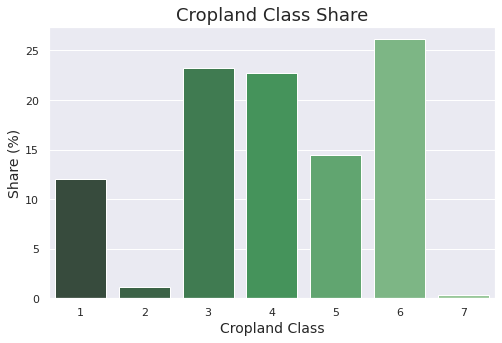

In [7]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(ax=ax, x = class_share.index, y = class_share, palette='Greens_d')
plt.title('Cropland Class Share', fontsize=18)
plt.xlabel('Cropland Class', fontsize=14)
plt.ylabel('Share (%)', fontsize=14)

### 5.1. Correlation

<p style="text-align: justify">The correlation between each feature and the dependent variable, as well as the correlation among features (intercorrelation), provide elements to tackle potential undesired collinearity.</p>
<p style="text-align: justify">The code below assists in identifying and sorting high feature intercorrelation cases based on the corresponding correlation coefficients (in descending order). A threshold of 0.95 has been arbitrarily defined for filtering highly intercorrelated features.</p>

In [8]:
highly_correlated_feature_pairs = []
highly_correlated_features_to_drop = []

correlation_matrix = dataset.corr().abs()
upper_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
for row in range(upper_matrix.shape[0]):
    for column in range(upper_matrix.shape[1]):
        if upper_matrix.iloc[row, column] > 0.95:
            highly_correlated_feature_pairs.append([row, column, upper_matrix.iloc[row, column]])
            
print(f'Number of highly intercorrelated feature pairs: {len(highly_correlated_feature_pairs)}')

Number of highly intercorrelated feature pairs: 117


<p style="text-align: justify">As the articles cited in foreword anticipate in deep detail, there is indeed a set of features strongly intercorrelated.</p>
<p style="text-align: justify">For information only, the 10 most intercorrelated feature pairs are identified below along with their corresponding correlation coefficients. Readers must note that <b>six pairs of features</b> (!) are perfectly correlated (coefficient equals 1). This problem must always be addressed in data preprocessing.</p>

In [9]:
highly_correlated_feature_pairs = pd.DataFrame(highly_correlated_feature_pairs).sort_values(by=[2], ascending=False)
highly_correlated_feature_pairs.columns = ['feature_1', 'feature_2', 'correl']
highly_correlated_feature_pairs.head(10)

,feature_1,feature_2,correl
4,2,39,1.000000
38,51,88,1.000000
109,151,153,1.000000
45,54,86,1.000000
8,5,37,1.000000
102,142,147,1.000000
113,156,157,0.998716
13,7,15,0.995524
10,6,38,0.995455
60,62,79,0.995254


<p style="text-align: justify">Features to be dropped are pinned on a correlation map and removed from the dataset.</p>

In [10]:
highly_correlated_features_to_drop = [column for column in upper_matrix.columns if any(upper_matrix[column] > 0.95)]
dataset = dataset.drop(dataset[highly_correlated_features_to_drop], axis=1)

In [11]:
nr_features = dataset.shape[1] - 1
print(f'Optimized number of features: {nr_features}')

Optimized number of features: 102


<p style="text-align: justify">After dropping, the number of features was substantially reduced from 174 down to 102 (a 41.4 % decrease). Such dimensionality optimization not only assists in mitigating collinearity but also allows for the creation of streamlined machines and faster learning with lower processing and memory requirements.</p>
<p style="text-align: justify">A final correlation map including the dependent variable ('label') and the remaining feature set is charted below.</p>

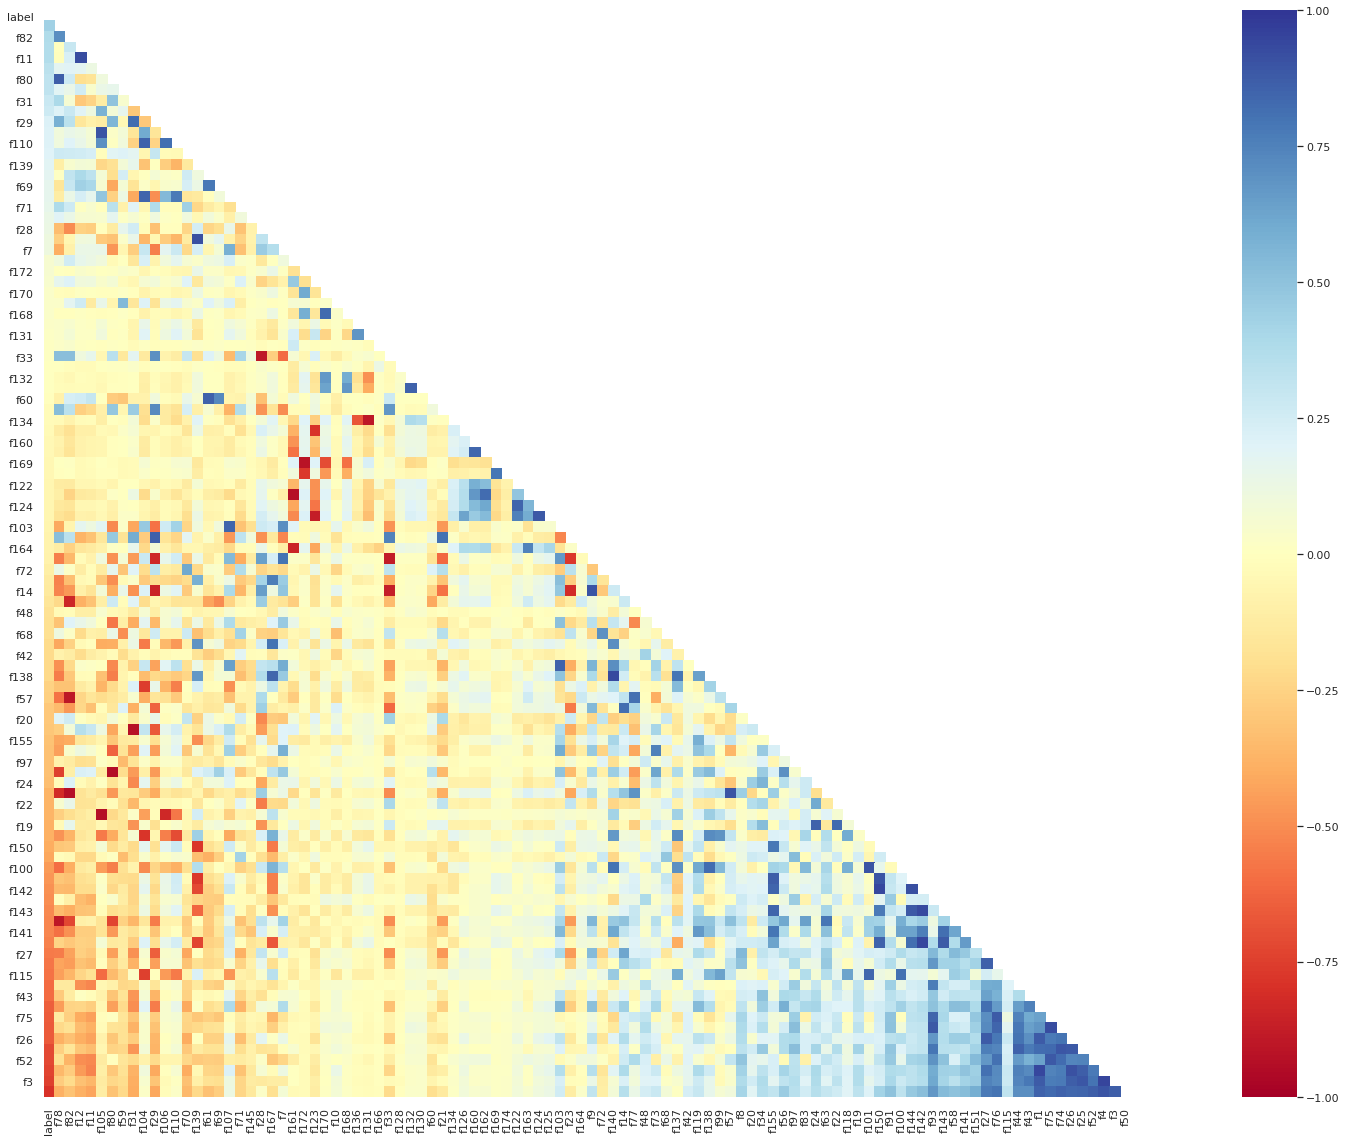

In [12]:
correlation_map(dataset, 'label', nr_features)

### 5.2. Feature assessment

<p style="text-align: justify">Invoking the 'assessment' custom function allows for plotting feature distribution patterns and their relationship with the 'label' dependent variable. This is done for the 10 features most correlated with the dependent variable 'label', just to provide a first glimpse of data behavior:</p>

In [13]:
most_correlated_features = dataset.corr().nlargest(10,'label')['label'].index

for column in most_correlated_features:
    assessment(dataset, 'label', column, -1)

KeyboardInterrupt: 

<p style="text-align: justify">The analysis shows that some variables are indeed skewed. However, no transformation will be performed <em>a priori</em>. This decision may be revisited later in light of the overall performance of trained classifiers.</p>

### 5.3. Segregating train and test sets

<p style="text-align: justify">As both classical (random forests) and deep (neural networks) machine learning solutions will be compared, two different sets of tensors will be developed, allowing for their use in each learning exercise.</p>
<p style="text-align: justify">After the elimination of highly intercorrelated features, our dataset now contains 325,834 observations with:</p>
<ul>
    <li style="text-align: justify">One column for labels (integers ranging from 1 to 7);</li>
    <li style="text-align: justify">102 columns for features.</li> 
</ul>
<p style="text-align: justify">The <b>features tensor</b> will be unique, serving both exercises.</p>
<p style="text-align: justify">Two <b>label tensors</b> will be constructed:</p>
<ul>
    <li style="text-align: justify">For the <b>random forest</b> classification, original labels (integers ranging from 1 to 7) will be preserved and accommodated into one unidimensional array;</li>
    <li style="text-align: justify">For the <b>neural network</b> classification, the label column will be one-hot encoded with the help of Pandas' get_dummies method. Therefore, labels will now consist of arrays with seven binary elements, each of them referring to a specific crop class, allowing for the final class identification based on the array element with the highest predicted value.</li>
</ul>
<p style="text-align: justify">The unique features tensor and the two label tensors are subsequently split into training and testing sets. The training set will host 80% of observations, while the testing set will accommodate the remaining 20%. Such proportions were arbitrarily chosen by the author.</p>

In [ ]:
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0:1]

In [ ]:
train_size = round(0.8 * len(X))

In [ ]:
X_train = X.iloc[:train_size, :].values
y_train = y.iloc[:train_size]

X_test = X.iloc[train_size:, :].values
y_test = y.iloc[train_size:]

<p style="text-align: justify">In preparation for testing at the end of this exercise, mapping class counts in the set of testing labels is important:</p>

In [ ]:
class_count = pd.Series(y_test.label.value_counts()).sort_index()
print('Class count - Test labels\n')
for i in range(0,7):
    print(f'Class {class_count.index[i]}: {class_count.iloc[i]}')

<p style="text-align: justify">Finally, label tensors (numpy arrays) are created for each separate exercise (random forest and neural network).</p>

In [ ]:
y_train_rf = y_train.label.values
y_test_rf = y_test.label.values

y_train_ann = pd.get_dummies(y_train.label).values
y_test_ann = pd.get_dummies(y_test.label).values

### 5.4. Feature scaling

<p style="text-align: justify">Scaling is performed on the training feature set only and applied to both training and testing feature sets (with the 'fit_transform' and 'transform' methods, respectively).</p>

In [ ]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 6. Machine Learning

### 6.1. Part I - Random Forest

#### 6.1.1. Model definition

<p style="text-align: justify">In the first part of this exercise a random forest-based classifying machine will be trained and tested in order to validate previous results achieved by researchers cited in foreword.</p>
<p style="text-align: justify">Such random forest-based engine will be implemented with scikit-learn's RandomForestClassifier. Initially, the default set of parameters will be used, with few exceptions outlined below. No parameter optimization will be performed in advance. This decision may also be reassessed based on performance metrics achieved in testing.</p>
<p style="text-align: justify">Some relevant parameters and default values for the RandomForestClassifier are listed below:</p>
<ul>
    <li style="text-align: justify">'n_estimators'- Number of trees in the forest (default 10);</li>
    <li style="text-align: justify">'max_depth' - Maximum tree depth (default None). Per the documentation, if 'None', "<em>nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split</em> (see below)";</li>
    <li style="text-align: justify">'min_samples_split' - Minimum number of samples required to split an internal node, tree specific (default 2);</li>
    <li style="text-align: justify">'min_samples_leaf' - Minimum number of samples in newly created leaves (default 1);</li>
    <li style="text-align: justify">'n_jobs' - Number of jobs to run in parallel for both fitting and predicting (default 1). Per the documentation, "<em>if -1, then the number of jobs is set to the number of cores</em>".</li>
</ul>

#### 6.1.2. Model fitting

<p style="text-align: justify">The classifier will be instantiated with n_estimators = 100 (i.e. the forest will comprise 100 decision trees) and n_jobs = 4 (allowing for the use of 4 processing cores).</p>
<p style="text-align: justify">The author selected a number of trees relatively close to the final number of features (102) for a first shot. However, a more robust optimization of relevant hyperparameters is recommended, e.g. through the use of <b>validation curves</b>. Readers are welcome to experiment.</p>

In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, n_jobs=4)

random_forest_classifier.fit(X_train, y_train_rf)

#### 6.1.3. Predictions

<p style="text-align: justify">After fitting the model to the training set, predictions are generated for the testing set. As a reminder, predictions for each observation will be scalars ranging from 1 to 7, referring to one particular crop class:</p>

In [ ]:
y_pred_rf = random_forest_classifier.predict(X_test)

<p style="text-align: justify">For information only (a first sanity check), the first prediction in the 'y_pred_rf' array matches the actual class for the corresponding test set observation hosted in the 'y_test_rf' array. So far, so good...</p>

In [ ]:
print(f'Predicted class: {y_pred_rf[0]}')
print(f'Actual class: {y_test_rf[0]}')

<p style="text-align: justify"></p>

### 6.2. Part II - Deep Learning (Artificial Neural Network)

#### 6.2.1. Model definition

<p style="text-align: justify">The artificial neural network (ANN) architecture comprises a sequential structure with:</p>
<ul>
    <li>one input layer (102 input nodes);</li>
    <li>three hidden layers (204, 204 and 102 nodes, respectively);</li>
    <li>one seven-node output layer.</li>
</ul>
<p style="text-align: justify">As features are standardized real numbers, '<b>relu</b>' is elected as the activation function of choice for hidden layers. In addition, as this is a multiclass classification exercise, where the output is intended to be binary ('1' for the identified class, '0' for all other classes), the choice of '<b>softmax</b>' as the activation function for the output layer seems adequate.</p>
<p style="text-align: justify">'<b>Adam</b>' has been elected as the optimizer, and its constituent parameters expanded to give some flexibility to play, in particular, with the learning rate. As this is a multiclass classification exercise, '<b>categorical_crossentropy</b>' is selected as the loss function. The fitting performance will be assessed using '<b>accuracy</b>' as the metric of choice.</p>

<img src="https://i.imgur.com/XcKIjmy.png" width="600" height="600">

In [ ]:
# ANN
ann_classifier = Sequential()

# Input layer and first dense layer
ann_classifier.add(Dense(units = 204, kernel_initializer = 'uniform', activation = 'relu', input_dim = 102))
ann_classifier.add(Dropout(0.1))

# Second dense layer
ann_classifier.add(Dense(units = 204, kernel_initializer = 'uniform', activation = 'relu'))
ann_classifier.add(Dropout(0.1))

# Third dense layer
ann_classifier.add(Dense(units = 102, kernel_initializer = 'uniform', activation = 'relu'))
ann_classifier.add(Dropout(0.1))

# Output layer
ann_classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'softmax'))

# Model compilation

optim = Adam(learning_rate=0.0005)

ann_classifier.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### 6.2.2. Model fitting

<p style="text-align: justify">As the number of observations is huge, no cross-validation mechanism will be implemented <em>a priori</em>, another decision subject to later revision, if necessary.</p>

In [ ]:
ann_train_history = ann_classifier.fit(X_train, y_train_ann, batch_size = 64, epochs = 100, verbose=0)

<p style="text-align: justify">Training accuracy and loss per training epoch are charted below.</p>
<p style="text-align: justify">As we are dealing with hundreds of thousands of observations, it is not unusual to see a neural network model converging fast. In this case, batches contain 64 observations. In every epoch the model will be exposed to more than 5,000 different batches. Few epochs may suffice to lead to high accuracy, low loss levels already in the beginning of the training session.</p>
<p style="text-align: justify">In this exercise 100 epochs were scheduled, as the author was interested in investigating potential overfitting. In a final implementation, a shorter training might be considered.</p>

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,6))
sns.set_style("darkgrid")
ax2 = ax1.twinx()
ax1.plot(ann_train_history.history['accuracy'], color='blue')
ax2.plot(ann_train_history.history['loss'], color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='y', colors='blue')
ax2.set_ylabel('Loss')
ax2.tick_params(axis='y', colors='red')
ax2.grid(False)
plt.show()

#### 6.2.3. Predictions

<p style="text-align: justify">After fitting the model to the training set, predictions are generated for the testing set. As a reminder, each prediction will correspond to an array with seven elements, each of them referring to one particular crop class. The final array is '<b>binarized</b>': the array element with the highest value will be converted to '1' while all other array elements will be converted to '0'.</p>

In [ ]:
y_pred_ann = ann_classifier.predict(X_test)
for i in range(len(y_pred_ann)):
    for j in range(7):
        if y_pred_ann[i][j] == y_pred_ann[i].max():
            y_pred_ann[i][j] = 1
        else:
            y_pred_ann[i][j] = 0
y_pred_ann = y_pred_ann.astype(int)

<p style="text-align: justify">A new sanity check reveals that the first prediction in the 'y_pred_ann' tensor matches the array generated for the first test set label - the class has been correctly predicted for this particular observation with our neural network.</p>

In [ ]:
print(f'Predicted: {y_pred_ann[0]}')
print(f'Actual: {y_test_ann[0]}')

## 7. Classification performance

<p style="text-align: justify">In classification problems the overall model performance can be measured in more than one way. Along with the traditional calculation of statistical performance metrics directly from the 'predicted' and 'actual' testing tensors, <b>confusion matrices</b> provide a visual, quantitative assessment of the model performance on both overall and 'per class' basis.</p>
<p style="text-align: justify">Performance is herein evaluated with both statistical metrics and confusion matrices for the two models introduced in Sections 7.1 (Random Forest) and 7.2 (Neural Network). As a reminder, in confusion matrices:</p>
<ul>
    <li>Columns correspond to <b>predicted</b> classes;</li>
    <li>Rows correspond to <b>actual</b> classes.</li>
</ul>
<p style="text-align: justify">The outstanding results achieved in each case are discussed in detail in Section 8.</p>

### 7.1. Random Forest

In [ ]:
rf_cm = np.zeros((7,7))

In [ ]:
rf_pred_correct = 0
rf_pred_incorrect = 0
for i in range(len(y_test)):
    rf_index_test = y_test_rf[i] - 1
    rf_index_pred = y_pred_rf[i] - 1
    rf_cm[rf_index_test][rf_index_pred] += 1
    if rf_index_test == rf_index_pred:
        rf_pred_correct += 1
    else:
        rf_pred_incorrect += 1

In [ ]:
rf_cmatrix = pd.DataFrame(rf_cm.astype(int),
                          index = ['Corn', 'Pea', 'Canola', 'Soy', 'Oat', 'Wheat', 'Broadleaf'],
                          columns = ['Corn', 'Pea', 'Canola', 'Soy', 'Oat', 'Wheat', 'Broadleaf'])
rf_cmatrix

In [ ]:
rf_accuracy = accuracy_score(y_test_rf, y_pred_rf)
rf_precision, rf_recall, rf_f_score, rf_support = precision_recall_fscore_support(y_test_rf, y_pred_rf, average='macro')
print(f'Accuracy: {rf_accuracy * 100:.2f} %')
print(f'Precision: {rf_precision * 100:.2f} %')
print(f'Recall: {rf_recall * 100:.2f} %')
print(f'F-Score: {rf_f_score * 100:.2f} %')

In [ ]:
print('Accuracy per class\n')
for i in range(len(rf_cmatrix)):
    class_accuracy = rf_cmatrix.iloc[i,i] / rf_cmatrix.sum(axis=0)[i]
    print(f'{rf_cmatrix.columns[i]}: {class_accuracy*100:.2f} %')

### 7.2. Deep Learning (Artificial Neural Network)

In [ ]:
ann_cm = np.zeros((7,7))

In [ ]:
ann_pred_correct = 0
ann_pred_incorrect = 0
for i in range(len(y_test_ann)):
    if y_pred_ann[i].sum() > 0:
        ann_index_test = np.where(y_test_ann[i] == 1)[0][0]
        ann_index_pred = np.where(y_pred_ann[i] == 1)[0][0]
        ann_cm[ann_index_test][ann_index_pred] += 1
        if ann_index_test == ann_index_pred:
            ann_pred_correct += 1
        else:
            ann_pred_incorrect += 1


In [ ]:
ann_cmatrix = pd.DataFrame(ann_cm.astype(int),
                           index = ['Corn', 'Pea', 'Canola', 'Soy', 'Oat', 'Wheat', 'Broadleaf'],
                           columns = ['Corn', 'Pea', 'Canola', 'Soy', 'Oat', 'Wheat', 'Broadleaf'])
ann_cmatrix

In [ ]:
ann_accuracy = accuracy_score(y_test_ann, y_pred_ann)
ann_precision, ann_recall, ann_f_score, ann_support = precision_recall_fscore_support(y_test_ann, y_pred_ann, average='macro')
print(f'Accuracy: {ann_accuracy * 100:.2f} %')
print(f'Precision: {ann_precision * 100:.2f} %')
print(f'Recall: {ann_recall * 100:.2f} %')
print(f'F-Score: {ann_f_score * 100:.2f} %')

In [ ]:
print('Accuracy per class\n')
for i in range(len(ann_cmatrix)):
    class_accuracy = ann_cmatrix.iloc[i,i] / ann_cmatrix.sum(axis=0)[i]
    print(f'{ann_cmatrix.columns[i]}: {class_accuracy*100:.2f} %')

## 8. Discussion and Final Remarks

<p style="text-align: justify">This 'dual' machine learning exercise was of particular interest from a data science educational perspective. Comments:</p>
<ol>
    <li style="text-align: justify">First and foremost, results confirm that the combination of optical and radar-based information leads to very accurate remote cropland mapping;</li>
    <li style="text-align: justify">Once again the importance of proper data preprocessing was revealed. This particular dataset - which proved at the end to be very robust and representative - was originally affected by <b>severe feature intercorrelation</b>. Indeed, one of the articles co-authored by Dr. Khosravi was entirely dedicated to a method to reduce the dataset dimensionality. Dropping redundant estimators is a healthy measure to mitigate collinearity and optimize machine architectures - and so was done;</li>
    <li style="text-align: justify">Nice results were obtained with one of the most classic random forest classifiers available. It is though important to mention that the selection of a proper number of trees and depth parameters may affect results significantly. The author experimented with both smaller numbers of trees and lower depth architectures, and some deterioration was observed, as expected. If properly manipulated, random forests are great predictive tools and their performance pretty much matches those of more complex, sophisticated algorithms;</li>
    <li style="text-align: justify">The neural network performed slightly better than the random forest. As discussed above, also here the adequate architecture and hyperparameter selection is key;</li>
    <li style="text-align: justify">Some potential improvements were left aside (treatment of skewed features, cross-validation and hyperparameter optimization) to be revisited after the final performance was known. As both machines performed outstandingly, such potential improvements were not pursued. Readers are though invited to experiment;</li>
    <li style="text-align: justify">At last, the inspection of both confusion matrices indicates that:</li>
    <ul>
        <li style="text-align: justify">More 'confusion' is experienced between '<b>wheat</b>' and '<b>oat</b>' crop cultures, which account for the highest numbers of incorrect predictions;</li>
        <li style="text-align: justify">In general terms, accuracies per crop class did not differ much - all above 99%. The exception was the '<b>broadleaf</b>' class, where accuracies were relatively lower. This should be expected, as this is the most misrepresented class (smallest number of observations);</li>
        <li>Focusing now on the '<b>broadleaf</b>' class, deep learning was evidently superior in predicting such crops, suggesting that it might be a better alternative to tackle misrepresented classes in general.</li>
    </ul>
</ol>

In [ ]:
end_time = datetime.now()

print('\nStart time: ', start_time)
print('\nEnd time: ', end_time)
print('\nElapsed time: ', end_time - start_time)